In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!wget https://data.open-power-system-data.org/weather_data/2020-09-16/weather_data.csv

--2021-11-19 16:42:45--  https://data.open-power-system-data.org/weather_data/2020-09-16/weather_data.csv
Resolving data.open-power-system-data.org (data.open-power-system-data.org)... 85.13.152.63
Connecting to data.open-power-system-data.org (data.open-power-system-data.org)|85.13.152.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233540027 (223M) [text/csv]
Saving to: ‘weather_data.csv.1’

weather_data.csv.1  100%[===================>] 222.72M  8.21MB/s    in 34s     

2021-11-19 16:43:20 (6.49 MB/s) - ‘weather_data.csv.1’ saved [233540027/233540027]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

weather_df = pd.read_csv("weather_data.csv")

#italy_df = weather_df[ ["utc_timestamp","IT_temperature"] ]
#italy_df["utc_timestamp"] = pd.to_datetime(italy_df["utc_timestamp"])

In [ ]:
24*7*4*12

8064

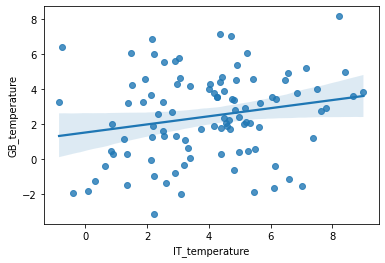

In [ ]:
#weather_df["IT_temperature"][0:2400:24].plot()
#weather_df["GB_temperature"][0:2400:24].plot()

import seaborn as sns

sns.regplot(x=weather_df["IT_temperature"][0:2400:24], y=weather_df["GB_temperature"][0:2400:24])


In [ ]:
weather_df.head()

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,CH_radiation_direct_horizontal,CH_radiation_diffuse_horizontal,CZ_temperature,CZ_radiation_direct_horizontal,CZ_radiation_diffuse_horizontal,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DK_temperature,DK_radiation_direct_horizontal,DK_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,FI_radiation_direct_horizontal,FI_radiation_diffuse_horizontal,FR_temperature,FR_radiation_direct_horizontal,FR_radiation_diffuse_horizontal,GB_temperature,GB_radiation_direct_horizontal,GB_radiation_diffuse_horizontal,GR_temperature,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal,...,HU_radiation_diffuse_horizontal,IE_temperature,IE_radiation_direct_horizontal,IE_radiation_diffuse_horizontal,IT_temperature,IT_radiation_direct_horizontal,IT_radiation_diffuse_horizontal,LT_temperature,LT_radiation_direct_horizontal,LT_radiation_diffuse_horizontal,LU_temperature,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,LV_temperature,LV_radiation_direct_horizontal,LV_radiation_diffuse_horizontal,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,NO_temperature,NO_radiation_direct_horizontal,NO_radiation_diffuse_horizontal,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal,PT_temperature,PT_radiation_direct_horizontal,PT_radiation_diffuse_horizontal,RO_temperature,RO_radiation_direct_horizontal,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,-6.287,0.0,0.0,-3.422,0.0,0.0,-1.261,0.0,0.0,-1.870,0.0,0.0,-7.060,0.0,0.0,8.066,0.0,0.0,-6.254,0.0,0.0,-0.537,0.0,0.0,-1.249,0.0,0.0,9.912,0.0,0.0,...,0.0,1.292,0.0,0.0,0.301,0.0,0.0,-6.541,0.0,0.0,-5.150,0.0,0.0,-7.166,0.0,0.0,2.382,0.0,0.0,-7.038,0.0,0.0,-3.721,0.0,0.0,12.862,0.0,0.0,-0.031,0.0,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1,1980-01-01T01:00:00Z,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,-6.602,0.0,0.0,-3.360,0.0,0.0,-1.414,0.0,0.0,-1.914,0.0,0.0,-7.341,0.0,0.0,7.960,0.0,0.0,-6.232,0.0,0.0,-0.489,0.0,0.0,-1.377,0.0,0.0,9.369,0.0,0.0,...,0.0,1.121,0.0,0.0,0.145,0.0,0.0,-6.509,0.0,0.0,-5.333,0.0,0.0,-7.371,0.0,0.0,2.236,0.0,0.0,-6.941,0.0,0.0,-3.806,0.0,0.0,12.757,0.0,0.0,0.311,0.0,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
2,1980-01-01T02:00:00Z,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,-6.981,0.0,0.0,-3.429,0.0,0.0,-1.571,0.0,0.0,-1.976,0.0,0.0,-7.591,0.0,0.0,8.008,0.0,0.0,-6.343,0.0,0.0,-0.391,0.0,0.0,-1.449,0.0,0.0,9.056,0.0,0.0,...,0.0,0.980,0.0,0.0,-0.029,0.0,0.0,-6.416,0.0,0.0,-5.167,0.0,0.0,-7.342,0.0,0.0,2.086,0.0,0.0,-6.856,0.0,0.0,-3.868,0.0,0.0,12.674,0.0,0.0,0.568,0.0,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
3,1980-01-01T03:00:00Z,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,-7.368,0.0,0.0,-3.697,0.0,0.0,-1.760,0.0,0.0,-2.040,0.0,0.0,-7.716,0.0,0.0,8.065,0.0,0.0,-6.550,0.0,0.0,-0.354,0.0,0.0,-1.481,0.0,0.0,8.658,0.0,0.0,...,0.0,0.944,0.0,0.0,-0.191,0.0,0.0,-6.197,0.0,0.0,-5.105,0.0,0.0,-7.206,0.0,0.0,1.861,0.0,0.0,-6.761,0.0,0.0,-3.934,0.0,0.0,12.622,0.0,0.0,0.610,0.0,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
4,1980-01-01T04:00:00Z,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,-7.849,0.0,0.0,-4.081,0.0,0.0,-1.995,0.0,0.0,-2.106,0.0,0.0,-7.638,0.0,0.0,8.009,0.0,0.0,-6.722,0.0,0.0,-0.354,0.0,0.0,-1.433,0.0,0.0,8.335,0.0,0.0,...,0.0,0.910,0.0,0.0,-0.275,0.0,0.0,-5.899,0.0

In [ ]:
import datetime 

weather_df["date"] = pd.date_range(start='1/1/1980', periods=len(weather_df), freq='H') 
weather_df['year'] = weather_df.date.dt.year 
weather_df['month'] = weather_df.date.dt.month 
weather_df['day'] = weather_df.date.dt.day 


In [ ]:
weather_df.isnull().sum().sum()

0

In [ ]:
weather_df[ ["date","year", "month", "day"]]

,date,year,month,day
0,1980-01-01 00:00:00,1980,1,1
1,1980-01-01 01:00:00,1980,1,1
2,1980-01-01 02:00:00,1980,1,1
3,1980-01-01 03:00:00,1980,1,1
4,1980-01-01 04:00:00,1980,1,1
...,...,...,...,...
350635,2019-12-31 19:00:00,2019,12,31
350636,2019-12-31 20:00:00,2019,12,31
350637,2019-12-31 21:00:00,2019,12,31
350638,2019-12-31 22:00:00,2019,12,31


In [ ]:
italy_df.head()

,utc_timestamp,IT_temperature
0,1980-01-01 00:00:00+00:00,0.301
1,1980-01-01 01:00:00+00:00,0.145
2,1980-01-01 02:00:00+00:00,-0.029
3,1980-01-01 03:00:00+00:00,-0.191
4,1980-01-01 04:00:00+00:00,-0.275


In [ ]:
shuffled_timeseries

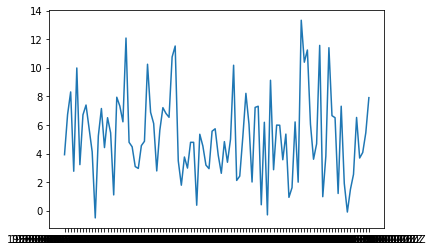

In [ ]:
weather_data = weather_df["IT_temperature"].iloc[:100].values
plt.plot(weather_df["utc_timestamp"].iloc[:100], weather_data)


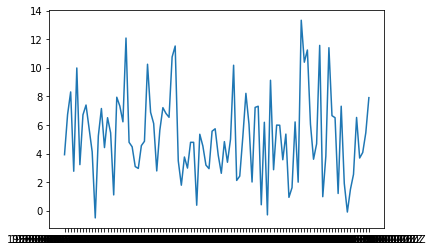

In [ ]:
np.random.shuffle(weather_data)
plt.plot(weather_df["utc_timestamp"].iloc[:100], weather_data[:100])

In [ ]:
torch.nn.RNN(batch_first=True) 

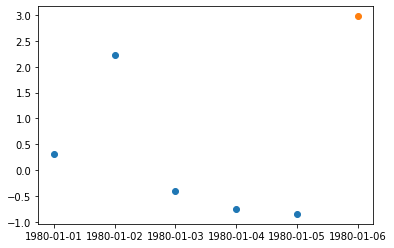

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=weather_df["date"][0:120:24], y=weather_df["IT_temperature"][0:120:24])
plt.scatter(x=weather_df["date"][120:144:24], y=weather_df["IT_temperature"][120:144:24])

x = [1,2,3,4,5]
    ....
    ....
    [2,3,41,4,3]nth row

y= [ 1
    2
    3
    4
    .
    .
    
    .
    nth] 

In [ ]:
features = []
targets = []
import numpy as np
#timeseries_fake_data = np.array([np.random.randint(0,100) for _ in range(1000)])
sequence_length = 5
jump_length = 24

for i in range(0, len(timeseries_fake_data), jump_length):
    if i+sequence_length >= len(timeseries_fake_data):
        break
    features.append(timeseries_fake_data[i:i+sequence_length])
    targets.append(timeseries_fake_data[i+sequence_length])

features = np.array(features)
targets = np.array(targets)


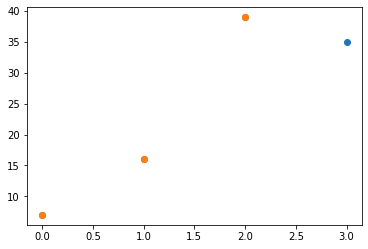

In [ ]:
plt.scatter(x=np.arange(4), y=timeseries_fake_data[0:4])
plt.scatter(x=np.arange(3), y=timeseries_fake_data[0:3])
#plt.scatter(x=np.arange(len(timeseries_fake_data)), y=timeseries_fake_data[0:100])


In [ ]:
features[0]

array([ 7, 16, 39, 35,  1])

In [ ]:
targets[0]

55

In [ ]:
import torch 
from torch.utils.data import DataLoader, TensorDataset

def batch_data(temprature, sequence_length, jump_length, batch_size):
    """
    Batch the neural network data using DataLoader
    :return: DataLoader with batched data
    """
    # TODO: Implement function
    
    features = []
    targets = []
    for i in range(0, len(temprature), jump_length):
        if i+sequence_length >= len(temprature):
            break
        features.append(temprature[i:i+sequence_length])
        targets.append(temprature[i+sequence_length])


    features = torch.tensor(features)
    targets = torch.tensor(targets)
    
    dataset = TensorDataset(features, targets)
    rnn_loader = DataLoader(dataset,batch_size=batch_size, shuffle=False)
    
    # return a dataloader
    return rnn_loader

Let's play with our data for a bit. Can you load data for everyday? Every 12 hours ? Every hour?

Also, can you load a single batch and visualize it ? Hint: Use matplotlib, plotly or seaborn ;)

In [ ]:
## Let's try it out

rnn_loader = batch_data(weather_df["IT_temperature"].iloc[:1000].values, 5, 1, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


In [ ]:

import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')

No GPU found. Please use a GPU to train your neural network.


In [ ]:
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers,seq_length):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, h_out):

        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_out, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        #h_out.detach_()
        h_out = h_out.detach()

        out = self.fc(h_out)
        return out, h_out


In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1
seq_length = 5
lstm = LSTM(num_classes, input_size, hidden_size, num_layers,seq_length)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):

    for features, targets in rnn_loader:
        #import pdb;pdb.set_trace()
        if features.size(0) != 32:
            break

        h_0 = Variable(torch.zeros(num_layers, 32, hidden_size))

        lstm.zero_grad()
        features = features.float()
        targets = targets.float()

        outputs, h_out = lstm.forward(features.reshape(features.size(0),seq_length,1), h_0)
        optimizer.zero_grad()
        
        # obtain the loss function
        #import pdb;pdb.set_trace()
        loss = criterion(outputs, targets)
        loss.backward()
        
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 35.24030
Epoch: 100, loss: 13.64434
Epoch: 200, loss: 7.29859
Epoch: 300, loss: 5.10168
Epoch: 400, loss: 10.63574
Epoch: 500, loss: 10.69814
Epoch: 600, loss: 8.44356
Epoch: 700, loss: 11.51249
Epoch: 800, loss: 10.84203
Epoch: 900, loss: 11.15373
Epoch: 1000, loss: 8.07206
Epoch: 1100, loss: 11.88849
Epoch: 1200, loss: 9.06467
Epoch: 1300, loss: 13.23244
Epoch: 1400, loss: 10.12303
Epoch: 1500, loss: 10.47847
Epoch: 1600, loss: 5.62560
Epoch: 1700, loss: 7.40462
Epoch: 1800, loss: 6.55114
Epoch: 1900, loss: 8.48381


In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()